# HOWTO: Запуск обучения модели на основе PL шаблона

Клонируем репозиторий [[git] 🐾 TrainTemplateMSUAI](https://github.com/VasilievArtyom/TrainTemplateMSUAI) с шаблоном обучения модели на Lightning:

*Замечание[1]: на практике вам следует создать копию данного репозитория, воспользовавшись инструкцией [[doc] 🛠️ Creating a repository from a template
](https://docs.github.com/en/repositories/creating-and-managing-repositories/creating-a-repository-from-a-template) и заменить ссылку на репозиторий в ячейке ниже на собственную.

*Замечание[2]: если вы планируете вести разработку своего проекта в закрытом репозитории, вам следует воспользоваться [[doc] 🛠️ данной инструкцией для](https://gist.github.com/sloanlance/c14af0280411650415b45bd7a29e867c) для правильной настройки прав доступа к вашему репозиторию из Colab блокнота.

In [ ]:
#! git clone https://github.com/VasilievArtyom/TrainTemplateMSUAI.git

In [1]:
%load_ext autoreload
%autoreload 2

*Замечание: более подробную информацию о том как работать с git можно найти в руководстве [[blog] ✏️ GitHowTo](https://githowto.com/ru)*

Перейдём в директорию, которая соотвествует репозиторию:

Установим необходимые зависимости:

In [2]:
from IPython.display import clear_output

In [3]:
%pip install lightning #только 1 раз
clear_output()

In [6]:
%pip install transformers
clear_output()

In [3]:
import lightning

/home/jupyter/.local/lib/python3.10/site-packages/transformers/utils/hub.py:128: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


Импортируем функцию, которая запускает пайплайн обучения на основе файла конфигурации:

In [25]:
from train import load_config, train

Конфигурация для обучения модели (см. `configs/train.yaml`):

In [88]:
train_config = load_config('configs/train.yaml')

In [89]:
print(train_config)

{'data_path': 'data/J0332_train_val_test', 'exp_path': 'Experiments', 'train': 'J0332_train.csv', 'val': 'J0332_val.csv', 'test': 'J0332_test.csv', 'exp_name': 'model_J0332', 'project': 'neural_iono', 'trainer': {'precision': 32, 'sync_batchnorm': True, 'gradient_clip_val': 1.0, 'max_epochs': 75, 'accelerator': 'gpu', 'devices': 'auto'}, 'weights': None, 'dataloader': {'batch_size': 128, 'num_workers': 2}, 'optimizer': 'adam', 'optimizer_params': {'lr': 0.01, 'weight_decay': 0.01}, 'scheduler': 'cosine', 'scheduler_params': {'warmup_epochs': 0}, 'checkpoint': {'monitor': 'MeanAbsoluteError/val', 'filename': 'model', 'mode': 'min'}}


Запустим TensorBoard, в случае если мы работаем в Google Colab:

Запускаем обучение модели:

In [90]:
train(train_config)

Seed set to 42
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Missing logger folder: Experiments/neural_iono/model_J0332/metrics
/home/jupyter/.local/lib/python3.10/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:653: Checkpoint directory /home/jupyter/work/resources/interactions/Experiments/neural_iono/model_J0332 exists and is not empty.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type             | Params
---------------------------------------------------
0 | model         | SLM              | 46.3 K
1 | criterion     | RMLoss           | 0     
2 | train_metrics | MetricCollection | 0     
3 | valid_metrics | MetricCollection | 0     
---------------------------------------------------
46.3 K    Trainable params
0         Non-trainable params
46.3 K    Total params
0.185     Total estimated model params size (MB)


Epoch 0: 100%|██████████| 8/8 [00:00<00:00,  8.61it/s, v_num=0, Loss/train=0.0462]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 1: 100%|██████████| 8/8 [00:00<00:00,  8.05it/s, v_num=0, Loss/train=0.0325, Loss/val=0.0623]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 2: 100%|██████████| 8/8 [00:00<00:00,  8.11it/s, v_num=0, Loss/train=0.0297, Loss/val=0.0341]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 3: 100%|██████████| 8/8 [00:00<00:00,  8.05it/s, v_num=0, Loss/train=0.0301, Loss/val=0.0328]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 4: 100%|██████████| 8/8 [00:00<00:00,  8.07it/s, v_num=0, Loss/train=0.0271, Loss/val=0.0134]
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 5: 100%|██████████| 8/8 [00:00<00:00,  8.01it/s, v_num=0, Loss/train=0.025, Loss/val=0.00705] 
Validation: |          | 0/? [00:00<?, ?it/s]
Epoch 6: 100%|██████████| 8/8 [00:00<00:00,  8.14it/s, v_num=0, Loss/train=0.0276, Loss/val=0.0144]
Validation: |          | 0/? [00:00<?, ?

`Trainer.fit` stopped: `max_epochs=75` reached.


Epoch 74: 100%|██████████| 8/8 [00:01<00:00,  6.66it/s, v_num=0, Loss/train=0.0266, Loss/val=0.00502]


Запустим прогон модели на тестовых данных и соберём таблицу с предсказаниями:

In [91]:
from inference import load_config, inference

In [93]:
test_config = load_config('configs/inference.yaml')

In [94]:
test_config

{'data_path': 'data/J0332_train_val_test',
 'test': 'J0332_test.csv',
 'save_path': 'Experiments/neural_iono/model_J0332',
 'test_name': 'val',
 'trainer': {'precision': 32, 'accelerator': 'auto', 'devices': 'auto'},
 'weights': 'Experiments/neural_iono/model_J0332/model.ckpt',
 'dataloader': {'batch_size': 8, 'num_workers': 2}}

In [95]:
inference(test_config)

/home/jupyter/work/resources/interactions/pl_models.py:132: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(config['weights'], map_location='cpu')['sta

Testing DataLoader 0: 100%|██████████| 16/16 [00:00<00:00, 150.19it/s]


In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def get_quality(y_test, y_pred, dataset, show_stat = False):
    rm_recovered  = dataset["Bpar"].to_numpy() * dataset["VTEC"].to_numpy() * 2.62e-6 / (y_pred)**0.5
    rm_real = dataset["RM_real"].to_numpy()
    time = dataset["time"].to_numpy()

    residual = rm_recovered - rm_real
    mae = mean_absolute_error(rm_real, rm_recovered)
    print("Средняя абсолютная ошибка между рядами:", mae)

    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    axs[0].plot(time, rm_recovered, color='blue', label='recovered')
    axs[0].plot(time, rm_real, color='red', label='real')
    axs[0].set_title('Real vs recovered')
    axs[0].legend()

    axs[1].plot(time, residual, color='black')
    axs[1].set_title('Residual')

    plt.tight_layout()
    plt.show()

    if show_stat:
        # Применение критерия Колмогорова-Смирнова
        statistic, p_value = stats.kstest(residual, 'norm')

        print(f"Статистика KS: {statistic}")
        print(f"P-значение: {p_value}")

        # Проверка на уровне значимости 0.05
        alpha = 0.05
        if p_value < alpha:
            print("Отвергаем нулевую гипотезу: данные не являются нормальными.")
        else:
            print("Не отвергаем нулевую гипотезу: данные могут быть нормальными.")

        # Визуализация
        plt.figure(figsize=(10, 5))
        plt.hist(residual, bins=30, density=True, alpha=0.6, color='g', label='Гистограмма')
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = stats.norm.pdf(x, np.mean(residual), np.std(residual))
        plt.plot(x, p, 'k', linewidth=2, label='Нормальное распределение')
        plt.title('Гистограмма и нормальное распределение')
        plt.legend()
        plt.show()

        #посмотрим на спектр мощности
        n = len(residual)
        frequencies = np.fft.fftfreq(n, d=np.mean(np.diff(time)))  # Частоты
        fft_values = np.fft.fft(residual)  # Преобразование Фурье
        power_spectrum = np.abs(fft_values)**2 / n  # Спектр мощности

        # Оставляем только положительные частоты
        positive_frequencies = frequencies[:n // 2]
        positive_power_spectrum = power_spectrum[:n // 2]

        # Визуализируем спектр мощности
        plt.figure(figsize=(12, 6))
        plt.plot(positive_frequencies, positive_power_spectrum)
        plt.title('Спектр мощности остатков')
        plt.yscale("log")
        plt.xscale("log")
        plt.grid()
        plt.show()

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import stats

header = ['X-ray B', 'SYM-H', 'F10.7', 'LST', 'SML', 'SMU', 'SMR', 'time', 'RM_real', 'RM_real_stat','VTEC', 'Bpar', 'z', 'target1']

test = pd.read_csv("data/J0332_train_val_test/J0332_test.csv", sep=' ', names=header)

In [96]:
t1_real = test["target1"].to_numpy()

path = os.path.join(test_config['save_path'], test_config['test_name'], "predictions.txt")
t1_predicted = np.loadtxt("/home/jupyter/datasphere/project/interactions/Experiments/neural_iono/model_J0332/val/predictions.txt")

Средняя абсолютная ошибка между рядами: 0.029343224260256807


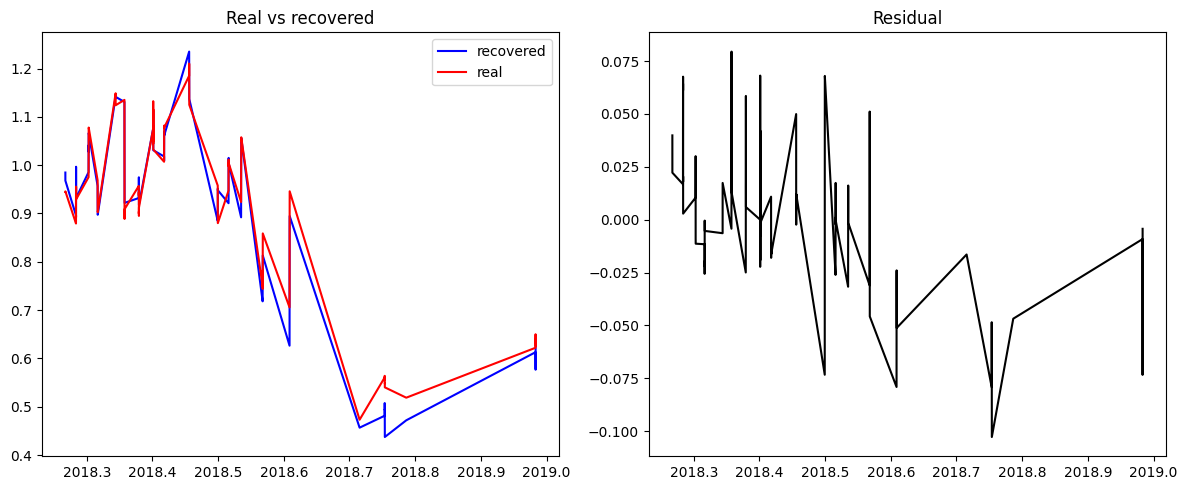

Статистика KS: 0.46832588243398243
P-значение: 1.8639919324827803e-25
Отвергаем нулевую гипотезу: данные не являются нормальными.


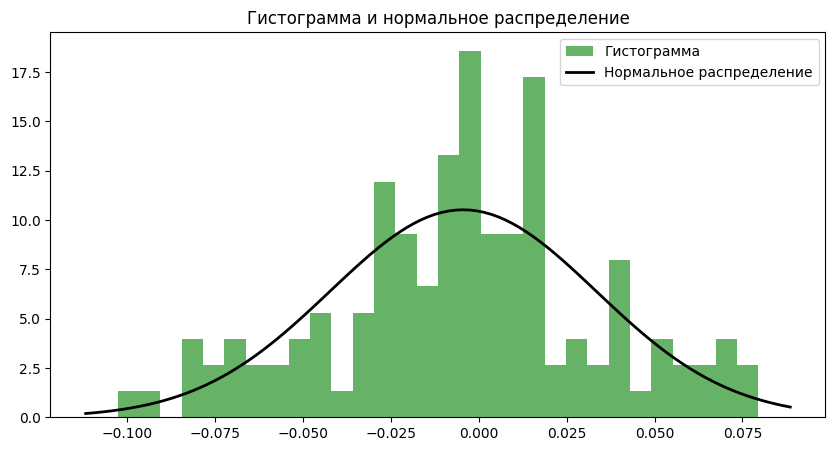

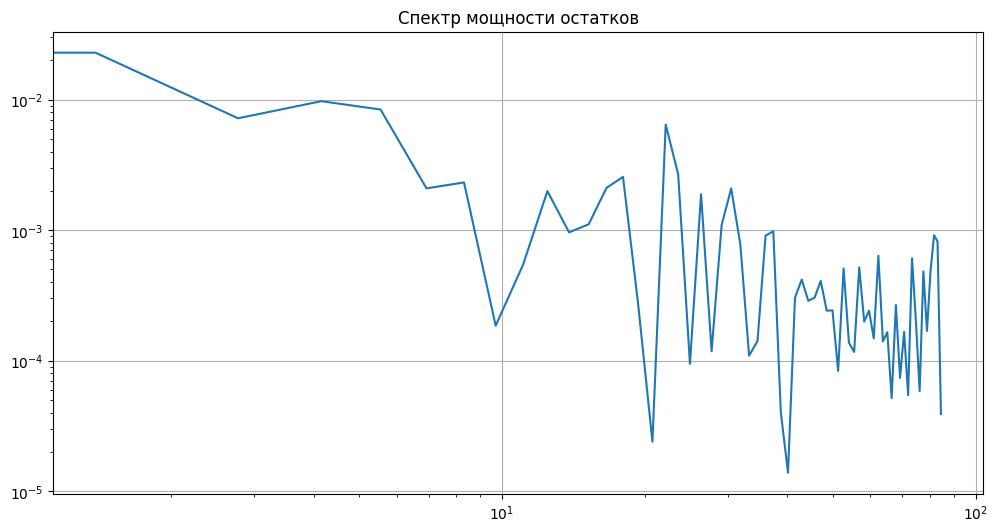

In [97]:
get_quality(t1_real, t1_predicted, test, show_stat = True)

In [5]:
from datasets.train import get_train_dl_ds

dl, ds = get_train_dl_ds(train_config)

In [8]:
i = iter(dl)
next(i)
next(i)

len(dl)

(tensor([[ 1.6375, -1.6635,  1.0851,  1.6283, -2.2550,  0.8108, -0.7094],
         [ 1.4209, -1.6682,  1.0851,  1.6283, -2.2550,  0.8108, -0.5301],
         [ 1.9991, -0.7915,  2.5745,  2.1932, -0.5269,  0.9189,  1.5952],
         [ 2.0068, -0.6682,  2.5745,  2.1932, -0.5269,  0.9189,  1.7741],
         [ 2.3817, -1.5877,  2.0851,  1.5112, -1.4221,  0.6216,  0.3511],
         [ 1.8840, -1.7156,  2.0851,  1.5112, -1.4221,  0.6216,  0.5302],
         [ 2.0827, -0.8957,  2.5745,  2.4644, -0.7422,  0.4324,  0.2040],
         [ 2.3889, -0.9289,  2.5745,  2.4644, -0.7422,  0.4324,  0.3831]]),
 tensor([[5.8798e-01, 2.7923e+01, 3.5202e+04, 4.9942e-02],
         [5.7808e-01, 2.7801e+01, 3.5243e+04, 3.0214e-02],
         [6.5943e-01, 3.0448e+01, 3.1093e+04, 4.1924e-01],
         [6.3907e-01, 3.0384e+01, 3.0397e+04, 4.5351e-01],
         [5.7173e-01, 2.7081e+01, 3.4531e+04, 1.7580e-01],
         [5.7234e-01, 2.6787e+01, 3.4202e+04, 2.1113e-01],
         [6.6929e-01, 2.9871e+01, 3.4756e+04, 1.4686